<div class="alert alert-info">
    <h1>User-defined wavelets</h1>
</div>

<div class="alert alert-info">
    <h2>Import packages</h2>
</div>

In [1]:
import os
from pprint import pprint

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
# Set numerical precision
# DTYPE = np.float64

In [4]:
time_step_in_seconds = 4e-4
start_time_in_seconds = 0.0
# time_shift_in_seconds = 1.0
end_time_in_seconds = 2.0

# Time axis
t = np.arange(start_time_in_seconds, end_time_in_seconds, time_step_in_seconds)

number_of_timesteps = t.size
pprint(number_of_timesteps)

5000


In [5]:
# Central frequency
center_frequency = 30.0
# Source delay
delay_seconds = 1.5/center_frequency

In [6]:
t_source = t - delay_seconds
tau = (np.pi * center_frequency * t_source) ** 2
a = 2.0
wavelet = (1 - a * tau) * np.exp(-(a / 2) * tau)

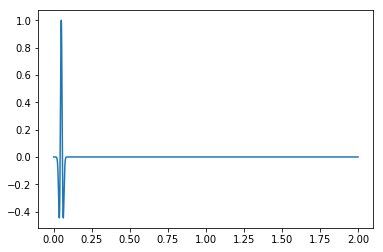

In [7]:
plt.plot(t, wavelet)

In [8]:
filename = f'user_defined_ricker_{int(center_frequency)}hz.bin'
fmt = np.float32

In [9]:
wavelet.astype(fmt).tofile(filename)

In [10]:
!ls user*.bin -altr

-rw-rw-r-- 1 bfilippo bfilippo 20000 Aug  4 16:14 user_dft_10hz.bin
-rw-rw-r-- 1 bfilippo bfilippo 20000 Aug  4 16:15 user_dft_3hz.bin
-rw-r--r-- 1 bfilippo bfilippo 20000 Aug  6 11:42 user_defined_sine_20hz.bin
-rw-r--r-- 1 bfilippo bfilippo 20000 Aug  6 12:32 user_defined_sine_10hz.bin
-rw-r--r-- 1 bfilippo bfilippo 20000 Aug  6 17:44 user_defined_ricker_10hz_filtered_10hz.bin
-rw-r--r-- 1 bfilippo bfilippo 20000 Aug  6 17:45 user_defined_ricker_20hz_filtered_10hz.bin
-rw-r--r-- 1 bfilippo bfilippo 40000 Aug  9 18:17 user_defined_ricker_10hz.bin
-rw-r--r-- 1 bfilippo bfilippo 40000 Aug  9 18:17 user_defined_ricker_20hz.bin
-rw-r--r-- 1 bfilippo bfilippo 20000 Aug 12 14:25 user_defined_ricker_30hz.bin


<div class="alert alert-info">
    <h2>Compute source term for frequency domain (FD) computation</h2>
</div>

In [36]:
Wavelet = np.fft.fft(wavelet)

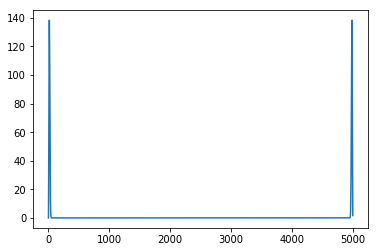

In [37]:
plt.plot(np.abs(Wavelet))